## Single Neuron Models  

#### Nonlinear Oscillators (Single Neuron Models)
* Fitzhugh-Nagumo
* Morris-Lecar  
* Hindmarsh-Rose
* Hodgkins-Huxley    

In [2]:
# Shebang
import tensorflow as tf
import numpy as np
from numpy.fft import fft, fftfreq, rfft, fftshift
import matplotlib.pyplot as plt
import logging

import Helper as hp

#### Fitzhugh-Nagumo  

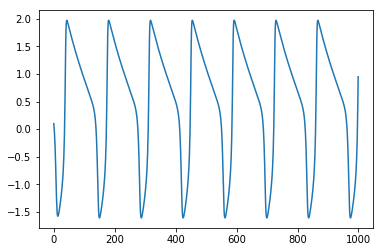

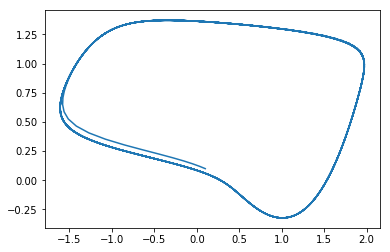

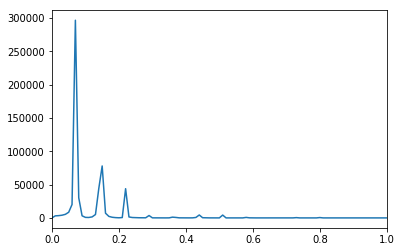

0.07


In [6]:
# Model Parameters

a = 0.75
b = 0.8
c = 3
i = -0.4
inits = [0.1, 0.1]
tfinal = 100
n = 1000

# Fitzhugh-Nagumo equations

def fitzhughnagumo_equation(state, t):
    v, w = tf.unstack(state)
    dv = c*(v + w - (v**3/3) + i)
    dw = -1/c * (v - a + b*w)
    return tf.stack([dv, dw])

# Tensorflow session

v, w = hp.generate_tensorflowsession(fitzhughnagumo_equation, inits, tfinal=tfinal, n=n)

# Membrane potential

hp.plotface(v)

# Phase plot

hp.plotface(v, w)

# Power Spectrum

freqs, ps, idx = hp.generate_powerspectrum(v, tfinal=tfinal, n=n)
hp.plotface(freqs[idx], ps[idx], xlim=[0,1])

# Frequency of max

print(hp.generate_maxfrequency(v, tfinal=tfinal, n=n))

[0.01 0.01]
[0.75, 0.8, 3, -0.4]


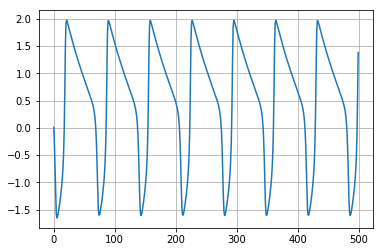

In [3]:
class FitzhughNagumo(hp.Model):

    """

    """

    def __init__(
            self,
            initial_conditions=[0.01, 0.01],
            model_parameters=[0.75, 0.8, 3, -0.4],
            final_time=100,
            time_steps=500):
        self.initial_conditions = np.array(initial_conditions)
        self.model_parameters = model_parameters
        self.final_time = final_time
        self.time_steps = time_steps

    def equations(self, state, t):
        v, w = tf.unstack(state)
        dv = self.model_parameters[2] * (v + w - (v**3/3) + self.model_parameters[3])
        dw = -1/self.model_parameters[2] * (v - self.model_parameters[0] + self.model_parameters[1]*w)
        return tf.stack([dv, dw])

    def solve(self):
        self.solution = self.tf_session(self.equations, self.initial_conditions)
        return self.solution

q = FitzhughNagumo()
print(q.initial_conditions)
print(q.model_parameters)
v, w = q.solve()
hp.plotface(v, grid=1)

In [21]:
a = 0.02
b = 0.2
c = -65
d = 2
i = 10
inits = [0.1, 0.1]
tfinal = 100
n = 1000

def Izhikevich(state, t):
    v, u = tf.unstack(state)
    dv = 0.04*(v**2) + 5*v + 140 - u + i
    du = a*(b*v - u)
    tf.cond(dv >= 30, dv = c)
    tf.cond(dv >= 30, du + d)
#     if dv >= 30:
#         v = c
#         u += d
    return tf.stack([dv, du])

v, u = hp.generate_tensorflowsession(Izhikevich, inits, tfinal=tfinal, n=n)

TypeError: cond() got an unexpected keyword argument 'dv'

In [ ]:

# a = (0.02, a)[a is not None]
# b = (0.2, b)[b is not None]
# c = (-65, c)[c is not None]
# d = (2, d)[d is not None]
# i = (10, i)[i is not None]
# if x[0] >= 30:
#         x[0] = c
#         x[1] += d
#     return array([0.04*(x[0]**2) + 5*x[0] + 140 - x[1] + i,
#                  a*(b*x[0] - x[1])])
    
class Izhikevich(hp.Model):

    """

    """

    def __init__(
            self,
            initial_conditions=[0.01, 0.01],
            model_parameters=[0.02, 0.2, -65., 2., 10.],
            final_time=100,
            time_steps=500):
        self.initial_conditions = np.array(initial_conditions)
        self.model_parameters = model_parameters
        self.final_time = final_time
        self.time_steps = time_steps

    def equations(self, state, t):
        v, u = tf.unstack(state)
        if v >= 30:
        dv = self.model_parameters[2] * (v + w - (v**3/3) + self.model_parameters[3])
        du = -1/self.model_parameters[2] * (v - self.model_parameters[0] + self.model_parameters[1]*w)
        return tf.stack([dv, du])

    def solve(self):
        self.solution = self.tf_session(self.equations, self.initial_conditions)
        return self.solution

#### Morris-Lecar  

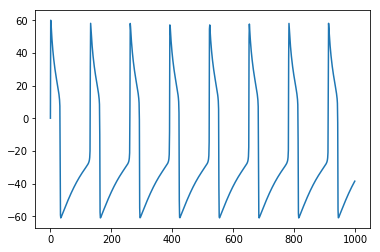

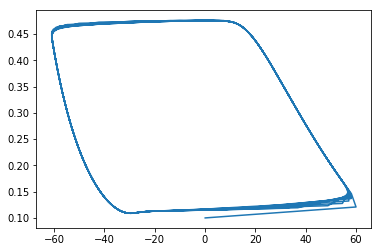

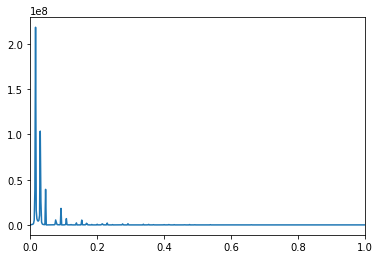

0.4


In [8]:
vk = -84
gk = 8
vca = 130
gca = 4.4
vl = -60
gl = 2
phi = 0.04
v1 = -1.2
v2 = 18
v3 = 2
v4 = 30
iapp = 80
inits = [0.1, 0.1]
tfinal = 500
num = 1000

def morrislecar_equation(state, t):
    v, n = tf.unstack(state)
    dv = (-gca*(0.5*(1 + tf.tanh((v - v1)/v2)))*(v - vca) - gk*n*(v - vk) - gl*(v - vl) + iapp)
    dn = (phi*((0.5*(1 + tf.tanh((v - v3)/v4))) - n))/(1/tf.cosh((v - v3)/(2*v4)))
    return tf.stack([dv, dn])

v, n = hp.generate_tensorflowsession(morrislecar_equation, inits, tfinal=tfinal, n=num)

hp.plotface(v)

hp.plotface(v, n)

freqs, ps, idx = hp.generate_powerspectrum(v, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(v, tfinal=tfinal, n=num))

[0.01 0.01]
[-84.0, 8.0, 130.0, 4.4, -60.0, 2.0, 0.04, -1.2, 18.0, 2.0, 30.0, 80.0]


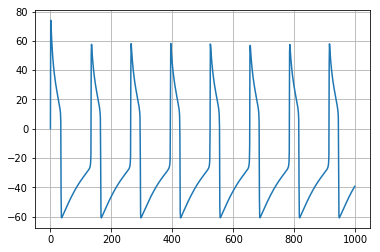

In [5]:
class MorrisLecar(hp.Model):

    """

    """

    def __init__(
            self,
            initial_conditions=[0.01, 0.01],
            model_parameters=[-84., 8., 130., 4.4, -60., 2., 0.04, -1.2, 18., 2., 30., 80.],
            final_time=500,
            time_steps=1000):
        self.initial_conditions = np.array(initial_conditions)
        self.model_parameters = model_parameters
        self.final_time = final_time
        self.time_steps = time_steps

    def equations(self, state, t):
        v, n = tf.unstack(state)
        dv = (-self.model_parameters[3]
              * (0.5 * (1 + tf.tanh((v - self.model_parameters[7]) / self.model_parameters[8])))
              * (v - self.model_parameters[2]) - self.model_parameters[1] * n
              * (v - self.model_parameters[0]) - self.model_parameters[5]
              * (v - self.model_parameters[4]) + self.model_parameters[11])
        dn = (self.model_parameters[6]
              * ((0.5 * (1 + tf.tanh((v - self.model_parameters[9]) / self.model_parameters[10]))) - n)) \
            / (1 / tf.cosh((v - self.model_parameters[9]) / (2 * self.model_parameters[10])))
        return tf.stack([dv, dn])

    def solve(self):
        self.solution = self.tf_session(self.equations, self.initial_conditions)
        return self.solution

q = MorrisLecar()
print(q.initial_conditions)
print(q.model_parameters)
v, n = q.solve()
hp.plotface(v, grid=1)

#### Hindmarsh-Rose  

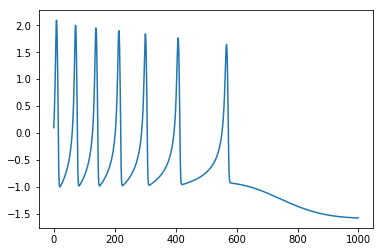

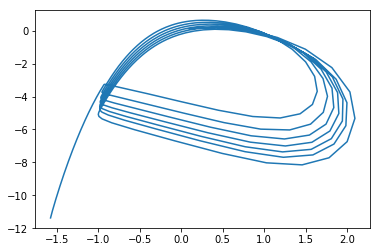

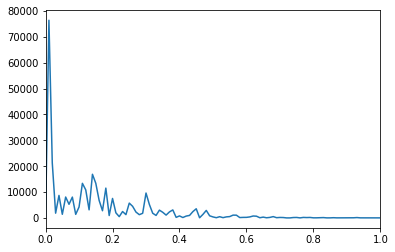

0.01


In [9]:
a = 1.0
b = 3.0
c = 1.0
d = 5.0
r = 0.006
s = 4.0
i = 1.3
xnot = -1.5
inits = [0.1, 0.1, 0.1]
tfinal = 100
num = 1000

def hindmarshrose_equation(state, t):
    x, y, z = tf.unstack(state)
    dx = y - a*(x**3) + (b*(x**2)) - z + i
    dy = c - d*(x**2) - y
    dz = r*(s*(x - xnot) - z)
    return tf.stack([dx, dy, dz])

x, y, z = hp.generate_tensorflowsession(hindmarshrose_equation, inits, tfinal=tfinal, n=num)

hp.plotface(x)

hp.plotface(x,y)

freqs, ps, idx = hp.generate_powerspectrum(x, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(x, tfinal=tfinal, n=num))

[0.1 0.1 0.1]
[1.0, 3.0, 1.0, 5.0, 0.006, 4.0, 1.3, -1.5]


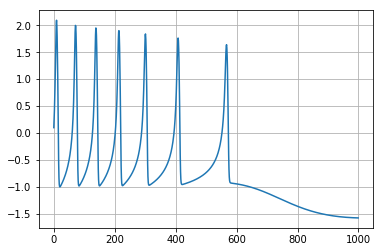

In [7]:
class HindmarshRose(hp.Model):

    """

    """

    def __init__(
            self,
            initial_conditions=[0.1, 0.1, 0.1],
            model_parameters=[1., 3., 1., 5., 0.006, 4., 1.3, -1.5],
            final_time=100,
            time_steps=1000):
        self.initial_conditions = np.array(initial_conditions)
        self.model_parameters = model_parameters
        self.final_time = final_time
        self.time_steps = time_steps

    def equations(self, state, t):
        x, y, z = tf.unstack(state)
        dx = y - self.model_parameters[0] * (x ** 3) \
            + (self.model_parameters[1] * (x ** 2)) - z + self.model_parameters[6]
        dy = self.model_parameters[2] - self.model_parameters[3] * (x ** 2) - y
        dz = self.model_parameters[4] * (self.model_parameters[5] * (x - self.model_parameters[7]) - z)
        return tf.stack([dx, dy, dz])

    def solve(self):
        self.solution = self.tf_session(self.equations, self.initial_conditions)
        return self.solution


q = HindmarshRose()
print(q.initial_conditions)
print(q.model_parameters)
x, y, z = q.solve()
hp.plotface(x, grid=1)

#### Hodgkin-Huxley  

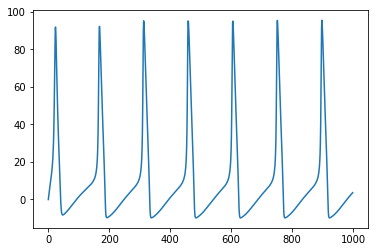

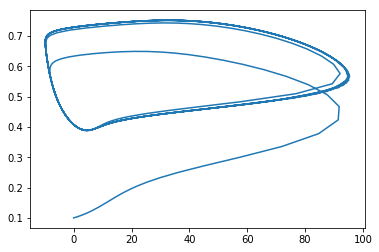

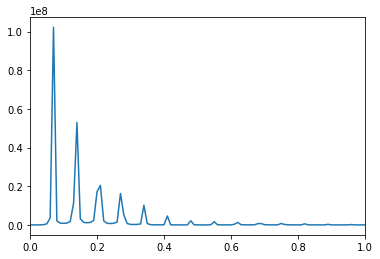

0.07


In [10]:
g_K = 36
g_Na = 120
g_L = 0.3
E_K = 12
E_Na = -115
E_L = -10.613
C_m = 1
I = -10
inits = [0.1, 0.1, 0.1, 0.1]
tfinal = 100
num = 1000

def hodgkinhuxley_equation(state, t):
    i, n, m, h = tf.unstack(state)
    # Alpha and beta functions for channel activation functions
    alpha_n = (0.01*(i + 10))/(tf.exp((i + 10)/10) - 1)
    beta_n = 0.125* tf.exp(i/80)
    alpha_m = (0.1*(i + 25))/(tf.exp((i + 25)/10) - 1)
    beta_m = 4*tf.exp(i/18)
    alpha_h = (0.07*tf.exp(i/20))
    beta_h = 1/(tf.exp((i + 30)/10) + 1)
    # Differential Equations
    di = (g_K*(n**4)*(i - E_K) + g_Na*(m**3)*h*(i - E_Na) + g_L*(i - E_L) - I)*(-1/C_m)
    dn = alpha_n*(1 - n) - beta_n*n
    dm = alpha_m*(1 - m) - beta_m*m
    dh = alpha_h*(1 - h) - beta_h*h
    return hp.tf.stack([di, dn, dm, dh])

i, n, m, h = hp.generate_tensorflowsession(hodgkinhuxley_equation, inits, tfinal=tfinal, n=num)

hp.plotface(-i)

hp.plotface(-i, n)

freqs, ps, idx = hp.generate_powerspectrum(-i, tfinal=tfinal, n=num)
hp.plotface(freqs[idx], ps[idx], xlim = [0,1])

print(hp.generate_maxfrequency(-i, tfinal=tfinal, n=num))

[0.1 0.1 0.1 0.1]
[36.0, 120.0, 0.3, 12.0, -115.0, -10.613, 1.0, -10.0]


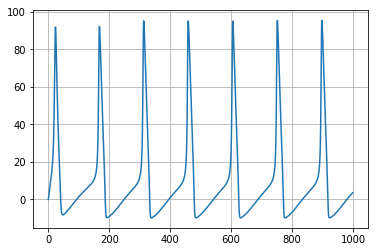

In [9]:
class HodgkinHuxley(hp.Model):

    """

    """

    def __init__(
            self,
            initial_conditions=[0.1, 0.1, 0.1, 0.1],
            model_parameters=[36., 120., 0.3, 12., -115., -10.613, 1., -10.],
            final_time=100,
            time_steps=1000):
        self.initial_conditions = np.array(initial_conditions)
        self.model_parameters = model_parameters
        self.final_time = final_time
        self.time_steps = time_steps

    def equations(self, state, t):
        i, n, m, h = tf.unstack(state)
        # Alpha and beta functions for channel activation functions
        alpha_n = (0.01 * (i + 10)) / (tf.exp((i + 10) / 10) - 1)
        beta_n = 0.125 * tf.exp(i / 80)
        alpha_m = (0.1 * (i + 25)) / (tf.exp((i + 25) / 10) - 1)
        beta_m = 4 * tf.exp(i / 18)
        alpha_h = (0.07 * tf.exp(i / 20))
        beta_h = 1 / (tf.exp((i + 30) / 10) + 1)
        # Differential Equations
        di = (self.model_parameters[0] * (n ** 4) * (i - self.model_parameters[3])
              + self.model_parameters[1] * (m ** 3) * h * (i - self.model_parameters[4])
              + self.model_parameters[2] * (i - self.model_parameters[5])
              - self.model_parameters[7]) * (-1 / self.model_parameters[6])
        dn = alpha_n * (1 - n) - beta_n * n
        dm = alpha_m * (1 - m) - beta_m * m
        dh = alpha_h * (1 - h) - beta_h * h
        return hp.tf.stack([di, dn, dm, dh])

    def solve(self):
        i, n, m, h = self.tf_session(self.equations, self.initial_conditions)
        self.solution = -1*i, n, m, h
        return self.solution

q = HodgkinHuxley()
print(q.initial_conditions)
print(q.model_parameters)
i, n, m, h = q.solve()
hp.plotface(i, grid=1)